In [1]:
%load_ext google.cloud.bigquery
from google.cloud import bigquery


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'learnings-333510-56d52b8c9b57.json'

In [5]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:02<00:00,  8.11rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,726810,24131,1931,6,26,81.699997,24,39.400002,7.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,726810,24131,1931,2,1,31.000000,24,NaN,NaN,NaN,...,NaN,None,0.0,NaN,True,True,True,True,True,True
2,726810,24131,1931,2,18,46.299999,24,32.099998,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,726810,24131,1931,8,26,70.699997,24,36.000000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,726810,24131,1931,4,25,49.500000,24,36.200001,6.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,260630,99999,1932,7,21,64.000000,4,NaN,NaN,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
6,726810,24131,1932,6,28,80.400002,24,46.700001,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1932,1,23,22.900000,24,12.100000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
8,726810,24131,1932,3,19,34.000000,24,27.799999,5.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
9,726810,24131,1932,1,19,40.500000,24,33.599998,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False


# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 12 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2009.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [6]:
'''
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 
'''



'\n%%bigquery \nSELECT\n*,\nFROM `bigquery-public-data.samples.gsod`\nLIMIT 20 \n'

## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [4]:
bqclient = bigquery.Client()

In [5]:
#%%bigquery
'''SELECT *,cast(concat(year,'-',month,'-',day)as datetime)as Date 
FROM `bigquery-public-data.samples.gsod` where (year between 2005 and 2009) 
and (station_number between 725300 and 726300) order by Date  '''


"SELECT *,cast(concat(year,'-',month,'-',day)as datetime)as Date \nFROM `bigquery-public-data.samples.gsod` where (year between 2005 and 2009) \nand (station_number between 725300 and 726300) order by Date  "

In [6]:

query_string= """SELECT *,cast(concat(year,'-',month,'-',day)as datetime)as Date 
FROM `bigquery-public-data.samples.gsod` where (year between 2005 and 2009) 
and (station_number between 725300 and 726300) order by Date"""

dataframe = (
    bqclient.query(query_string).result().to_dataframe(
        create_bqstorage_client=True,
    )
)
print(dataframe.head())

   station_number  wban_number  year  month  day  mean_temp  \
0          725520        14935  2005      1    1  27.700001   
1          726060        14764  2005      1    1  43.500000   
2          726163        99999  2005      1    1  41.700001   
3          725300        94846  2005      1    1  32.099998   
4          725383        99999  2005      1    1  35.900002   

   num_mean_temp_samples  mean_dew_point  num_mean_dew_point_samples  \
0                     24       18.700001                        24.0   
1                     24       34.400002                        24.0   
2                     24       31.299999                        24.0   
3                     24       21.200001                        24.0   
4                     24       27.000000                        24.0   

   mean_sealevel_pressure  ...  min_temperature_explicit  total_precipitation  \
0             1020.099976  ...                      None                 0.01   
1             1019.200012 

In [7]:
dataframe['year'].max()

2009

In [8]:
#pd.set_option('display.max_columns', None)

In [9]:
dataframe

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,Date
0,725520,14935,2005,1,1,27.700001,24,18.700001,24.0,1020.099976,...,None,0.01,NaN,True,True,True,True,True,True,2005-01-01
1,726060,14764,2005,1,1,43.500000,24,34.400002,24.0,1019.200012,...,None,0.01,NaN,False,False,False,False,False,False,2005-01-01
2,726163,99999,2005,1,1,41.700001,24,31.299999,24.0,1022.400024,...,None,0.08,NaN,False,False,False,False,False,False,2005-01-01
3,725300,94846,2005,1,1,32.099998,24,21.200001,24.0,1027.800049,...,None,0.00,NaN,False,False,False,False,False,False,2005-01-01
4,725383,99999,2005,1,1,35.900002,24,27.000000,24.0,NaN,...,None,0.00,NaN,True,True,True,True,True,True,2005-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377779,725456,4921,2009,12,31,28.600000,24,22.900000,24.0,NaN,...,None,NaN,NaN,False,False,False,False,False,False,2009-12-31
377780,725453,14930,2009,12,31,12.800000,24,7.900000,24.0,NaN,...,None,NaN,NaN,False,False,False,False,False,False,2009-12-31
377781,725462,14937,2009,12,31,20.500000,24,15.100000,24.0,1021.400024,...,None,0.06,NaN,False,False,False,False,False,False,2009-12-31
377782,725478,4920,2009,12,31,13.100000,24,7.800000,24.0,NaN,...,None,NaN,NaN,False,False,False,False,False,False,2009-12-31


### 2. Task 
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [10]:
list_station = dataframe['station_number'].unique().tolist()
#list_station =list_station.tolist()
#list_station.to_numpy()

In [11]:
for station in list_station:
    dfa = dataframe.loc[dataframe['station_number']==station,:]
    dfa.to_csv('%s/%d_station_number.csv' %('/home/jyoti/Project/7learnings/code-challenges/datascience/stations/', station),index=False)

In [197]:
dataframe.isnull().sum()

station_number                             0
wban_number                                0
year                                       0
month                                      0
day                                        0
mean_temp                                  0
num_mean_temp_samples                      0
mean_dew_point                           158
num_mean_dew_point_samples               158
mean_sealevel_pressure                145847
num_mean_sealevel_pressure_samples    145847
mean_station_pressure                 369069
num_mean_station_pressure_samples     369069
mean_visibility                         9679
num_mean_visibility_samples             9679
mean_wind_speed                          360
num_mean_wind_speed_samples              360
max_sustained_wind_speed                1092
max_gust_wind_speed                   130899
max_temperature                           98
max_temperature_explicit                  98
min_temperature                       377784
min_temper

In [12]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['month_year'] = pd.to_datetime(dataframe['Date']).dt.to_period('M')

In [13]:
df1_original = dataframe.copy()

In [36]:
dataframe = dataframe.set_index('Date')

In [37]:
dataframe

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,month_year
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,725520,14935,2005,1,1,27.700001,24,18.700001,24.0,1020.099976,...,None,0.01,NaN,True,True,True,True,True,True,2005-01
2005-01-01,726060,14764,2005,1,1,43.500000,24,34.400002,24.0,1019.200012,...,None,0.01,NaN,False,False,False,False,False,False,2005-01
2005-01-01,726163,99999,2005,1,1,41.700001,24,31.299999,24.0,1022.400024,...,None,0.08,NaN,False,False,False,False,False,False,2005-01
2005-01-01,725300,94846,2005,1,1,32.099998,24,21.200001,24.0,1027.800049,...,None,0.00,NaN,False,False,False,False,False,False,2005-01
2005-01-01,725383,99999,2005,1,1,35.900002,24,27.000000,24.0,NaN,...,None,0.00,NaN,True,True,True,True,True,True,2005-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-31,725456,4921,2009,12,31,28.600000,24,22.900000,24.0,NaN,...,None,NaN,NaN,False,False,False,False,False,False,2009-12
2009-12-31,725453,14930,2009,12,31,12.800000,24,7.900000,24.0,NaN,...,None,NaN,NaN,False,False,False,False,False,False,2009-12
2009-12-31,725462,14937,2009,12,31,20.500000,24,15.100000,24.0,1021.400024,...,None,0.06,NaN,False,False,False,False,False,False,2009-12


<AxesSubplot:xlabel='Date'>

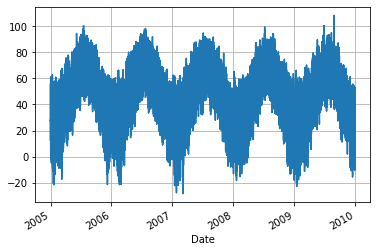

In [202]:
dataframe['mean_temp'].plot(grid = True)

In [203]:
import plotly.express as px

In [204]:
#fig = px.line(dataframe['mean_temp'])
#fig.update_xaxes(rangeslider_visible=True)
#fig.show()

Clearly there is seasonal variations in the temperature. Lets check other variables.

<AxesSubplot:xlabel='Date'>

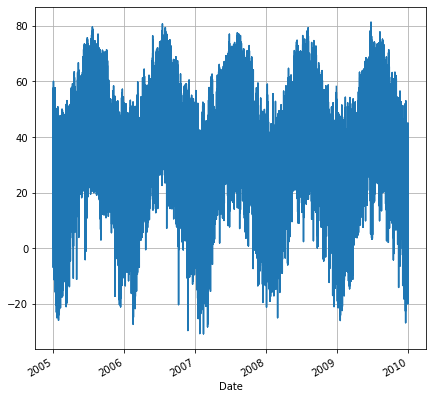

In [205]:
dataframe['mean_dew_point'].plot(figsize=(7,7), grid = True)


Lets see the variables in one figure to find the correlation between them.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

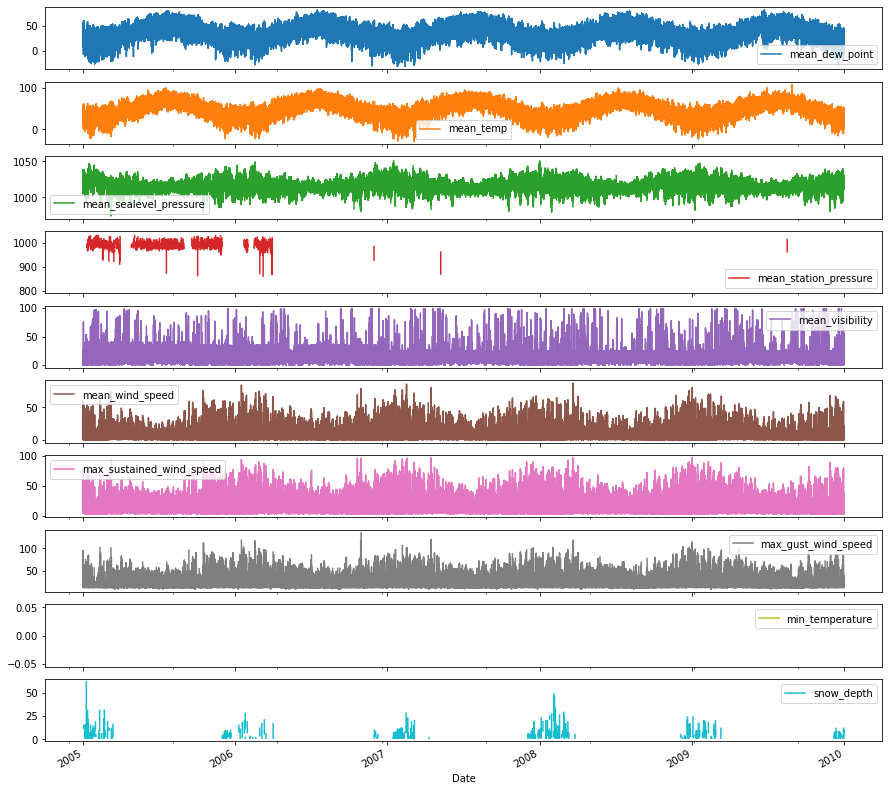

In [206]:
dataframe[['mean_dew_point','mean_temp','mean_sealevel_pressure','mean_station_pressure', 'mean_visibility', 'mean_wind_speed',
          'max_sustained_wind_speed', 'max_gust_wind_speed', 'min_temperature','snow_depth', 'min_temperature_explicit']].plot(subplots=True, figsize=(15,15))

    We see that Dew point and Temperature are positively correlated however sea level pressure is negatively correlated to Temperature and Mean Dew point.
    We do not have readings for station pressure after 2006.
    wind speed, sustained wind speed and gust wind speed are varying in same proportion.
    Lets investigate more to find more insights.

In [38]:
dataframe = dataframe['2005':'2009']

In [208]:
dataframe[['mean_wind_speed','max_sustained_wind_speed', 'max_gust_wind_speed']].describe()

,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed
count,377424.000000,376692.000000,246885.000000
mean,6.944941,14.255487,23.519782
std,4.240589,6.269371,7.389783
min,0.000000,1.900000,9.900000
25%,4.100000,9.900000,18.100000
50%,6.300000,13.000000,22.000000
75%,9.000000,17.100000,27.000000
max,87.400002,96.900002,135.000000


<ipython-input-209-c8036124f736>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dataframe['2006'][['month','mean_wind_speed','max_sustained_wind_speed', 'max_gust_wind_speed']].groupby('month').plot()


month
1     AxesSubplot(0.125,0.2;0.775x0.68)
2     AxesSubplot(0.125,0.2;0.775x0.68)
3     AxesSubplot(0.125,0.2;0.775x0.68)
4     AxesSubplot(0.125,0.2;0.775x0.68)
5     AxesSubplot(0.125,0.2;0.775x0.68)
6     AxesSubplot(0.125,0.2;0.775x0.68)
7     AxesSubplot(0.125,0.2;0.775x0.68)
8     AxesSubplot(0.125,0.2;0.775x0.68)
9     AxesSubplot(0.125,0.2;0.775x0.68)
10    AxesSubplot(0.125,0.2;0.775x0.68)
11    AxesSubplot(0.125,0.2;0.775x0.68)
12    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

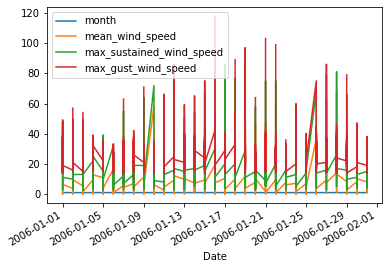

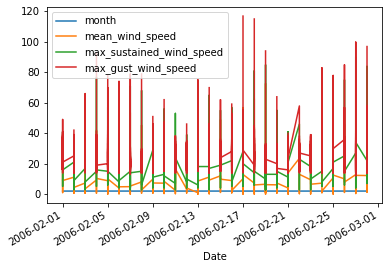

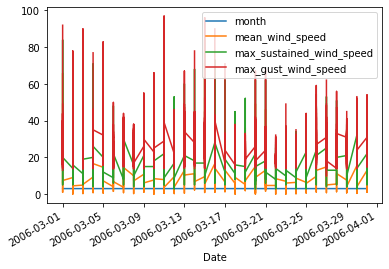

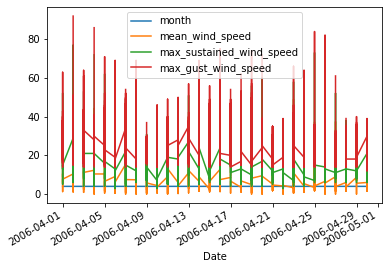

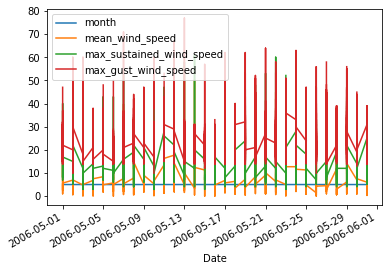

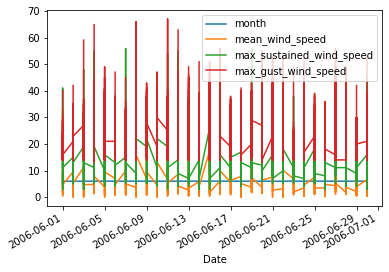

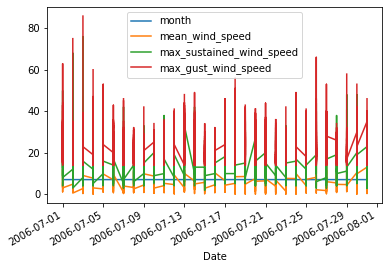

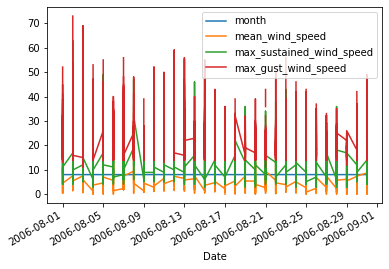

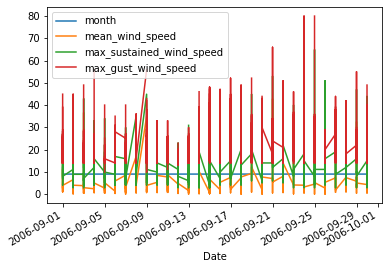

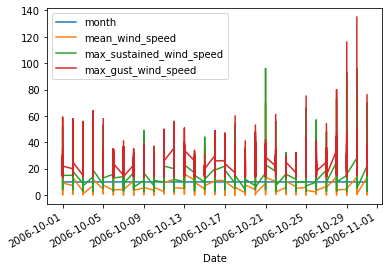

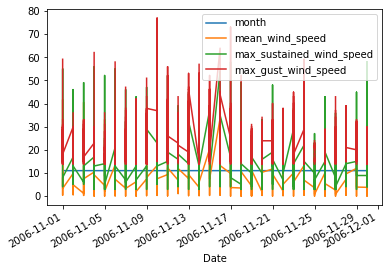

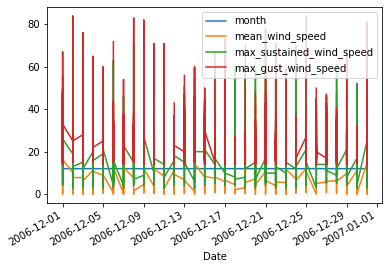

In [209]:
dataframe['2006'][['month','mean_wind_speed','max_sustained_wind_speed', 'max_gust_wind_speed']].groupby('month').plot()

We can see that the variation is same between gust speed and sustained wind speed. hence we can keep one out of 2 variables.
Gust wind speed has lot of variables hence we choose to keep sustained wind speed.
Now, lets compared sustained and mean wind speed.

    Lets remove the variables that are not informative and redundant

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [15]:
df2 = dataframe['2006'][['year','month','day','mean_wind_speed','max_sustained_wind_speed']].reset_index()
#df3 = dataframe['2007'][['year','month','day','mean_wind_speed','max_sustained_wind_speed']].reset_index()

<ipython-input-15-e171f1fa4add>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2 = dataframe['2006'][['year','month','day','mean_wind_speed','max_sustained_wind_speed']].reset_index()


In [16]:
df2['Day_month']=df2.apply(lambda x: str(x['day'])+'-'+str(x['month']), axis=1)
#df3['Day_month']=df3.apply(lambda x: str(x['day'])+'-'+str(x['month']), axis=1)

In [235]:
import matplotlib.pyplot as plt

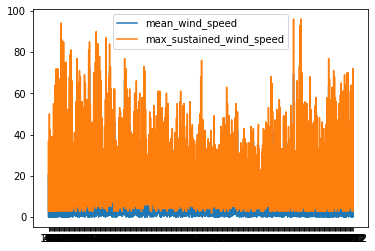

In [236]:
plt.plot(df2['Day_month'],df2['mean_wind_speed'])
plt.plot(df2['Day_month'],df2['max_sustained_wind_speed'])
plt.legend(['mean_wind_speed','max_sustained_wind_speed'])

we see that graphs are almost overlapping. Lets view it closely.

In [237]:
#fig = px.line(df2[['mean_wind_speed','max_sustained_wind_speed']])
#fig.update_xaxes(rangeslider_visible=True)
#fig.show()

Hence we decided to drop max_sustained_wind_speed.

In [39]:
dataframe = dataframe.drop('max_sustained_wind_speed', axis=1)

In [18]:
#Lets check categorical variables

In [41]:
dataframe['label'] = ((dataframe['fog'] == dataframe['rain']) & (dataframe['snow'] == dataframe['rain']) & (dataframe['snow'] == dataframe['hail'])
                      & (dataframe['thunder'] == dataframe['hail']) & (dataframe['thunder'] == dataframe['tornado']))

In [42]:
dataframe['label'].nunique()

1

In [43]:
#all categorical column has same values hence, I only keep snow.

In [44]:
dataframe = dataframe.drop(['fog','thunder','hail','tornado', 'rain','label'], axis = 1)

In [45]:
dataframe

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,num_mean_wind_speed_samples,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,snow,month_year
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,725520,14935,2005,1,1,27.700001,24,18.700001,24.0,1020.099976,...,24.0,18.1,21.900000,False,NaN,None,0.01,NaN,True,2005-01
2005-01-01,726060,14764,2005,1,1,43.500000,24,34.400002,24.0,1019.200012,...,24.0,22.9,35.599998,True,NaN,None,0.01,NaN,False,2005-01
2005-01-01,726163,99999,2005,1,1,41.700001,24,31.299999,24.0,1022.400024,...,24.0,28.9,37.400002,True,NaN,None,0.08,NaN,False,2005-01
2005-01-01,725300,94846,2005,1,1,32.099998,24,21.200001,24.0,1027.800049,...,24.0,22.9,24.799999,True,NaN,None,0.00,NaN,False,2005-01
2005-01-01,725383,99999,2005,1,1,35.900002,24,27.000000,24.0,NaN,...,24.0,15.9,28.400000,True,NaN,None,0.00,NaN,True,2005-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-31,725456,4921,2009,12,31,28.600000,24,22.900000,24.0,NaN,...,24.0,19.0,17.600000,True,NaN,None,NaN,NaN,False,2009-12
2009-12-31,725453,14930,2009,12,31,12.800000,24,7.900000,24.0,NaN,...,24.0,21.0,3.200000,True,NaN,None,NaN,NaN,False,2009-12
2009-12-31,725462,14937,2009,12,31,20.500000,24,15.100000,24.0,1021.400024,...,24.0,22.0,10.000000,False,NaN,None,0.06,NaN,False,2009-12


    Lets check other variables

In [245]:
import seaborn as sns

In [46]:
dataframe=dataframe.drop('min_temperature_explicit', axis= 1)

In [247]:
df3 = dataframe['2006']

<ipython-input-247-4245b11c19b2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df3 = dataframe['2006']


In [248]:
df3_temp = df3['2006-01-01':'2006-01-01']

In [249]:
#lets see the numerical value of correlation
h = df3['12-2006'][['mean_temp','mean_dew_point','mean_sealevel_pressure','mean_visibility',
                    'mean_wind_speed','max_temperature','total_precipitation', 'snow_depth']].corr(method='pearson')

<ipython-input-249-8b12b3a71f73>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  h = df3['12-2006'][['mean_temp','mean_dew_point','mean_sealevel_pressure','mean_visibility',


In [250]:
h

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth
mean_temp,1.000000,0.873419,-0.536276,-0.196240,0.027250,0.936290,0.212549,-0.471933
mean_dew_point,0.873419,1.000000,-0.510604,-0.365950,-0.020384,0.883519,0.319112,-0.404856
mean_sealevel_pressure,-0.536276,-0.510604,1.000000,0.178678,-0.287227,-0.522541,-0.266091,0.042608
mean_visibility,-0.196240,-0.365950,0.178678,1.000000,0.125195,-0.244807,-0.238363,0.332360
mean_wind_speed,0.027250,-0.020384,-0.287227,0.125195,1.000000,0.064021,0.172480,0.431906
max_temperature,0.936290,0.883519,-0.522541,-0.244807,0.064021,1.000000,0.257677,-0.433581
total_precipitation,0.212549,0.319112,-0.266091,-0.238363,0.172480,0.257677,1.000000,0.181454
snow_depth,-0.471933,-0.404856,0.042608,0.332360,0.431906,-0.433581,0.181454,1.000000


mean_temp, max_temperature, and mean_dew_point are highly correlated positively


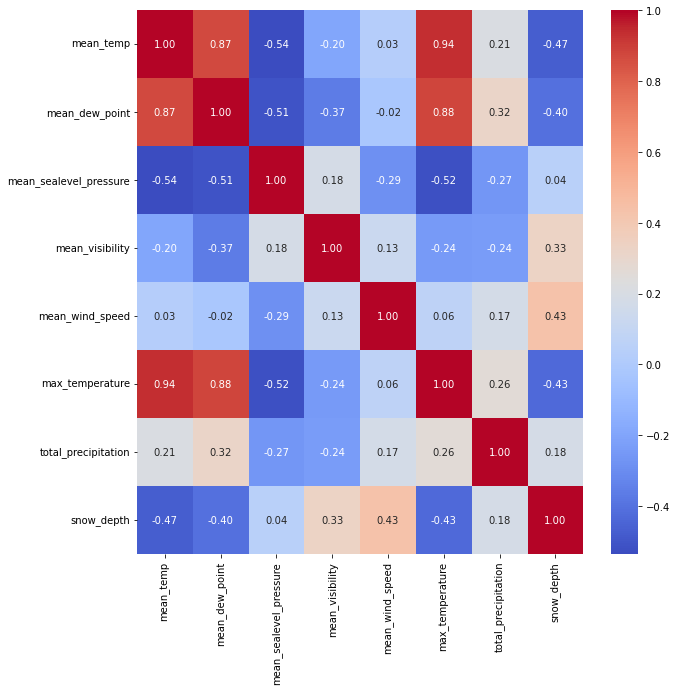

In [251]:
i = sns.heatmap(h,annot=True,fmt = '.2f',cmap='coolwarm')
i.figure.set_size_inches(10,10)

In [47]:
dataframe= dataframe.drop('max_temperature', axis = 1)

In [253]:
dataframe.columns

Index(['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp',
       'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_station_pressure', 'num_mean_station_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_gust_wind_speed',
       'max_temperature_explicit', 'min_temperature', 'total_precipitation',
       'snow_depth', 'snow', 'month_year'],
      dtype='object')

In [48]:
dataframe = dataframe.drop(['wban_number','num_mean_temp_samples','num_mean_dew_point_samples',
                            'num_mean_sealevel_pressure_samples','num_mean_station_pressure_samples',
                            'num_mean_visibility_samples', 'num_mean_wind_speed_samples',
                            'min_temperature','mean_station_pressure','mean_visibility', 'mean_wind_speed'
                            ,'max_temperature_explicit', 'total_precipitation',
                            'max_gust_wind_speed'], axis =1)

Lets check lag values, as lag values are used to convert time series into supervised machine larning data

In [255]:
dataframe

,station_number,year,month,day,mean_temp,mean_dew_point,mean_sealevel_pressure,snow_depth,snow,month_year
Date,,,,,,,,,,
2005-01-01,725520,2005,1,1,27.700001,18.700001,1020.099976,NaN,True,2005-01
2005-01-01,726060,2005,1,1,43.500000,34.400002,1019.200012,NaN,False,2005-01
2005-01-01,726163,2005,1,1,41.700001,31.299999,1022.400024,NaN,False,2005-01
2005-01-01,725300,2005,1,1,32.099998,21.200001,1027.800049,NaN,False,2005-01
2005-01-01,725383,2005,1,1,35.900002,27.000000,NaN,NaN,True,2005-01
...,...,...,...,...,...,...,...,...,...,...
2009-12-31,725456,2009,12,31,28.600000,22.900000,NaN,NaN,False,2009-12
2009-12-31,725453,2009,12,31,12.800000,7.900000,NaN,NaN,False,2009-12
2009-12-31,725462,2009,12,31,20.500000,15.100000,1021.400024,NaN,False,2009-12


<ipython-input-256-19729b3190b6>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pd.plotting.autocorrelation_plot(dataframe['2005']['mean_temp'])


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

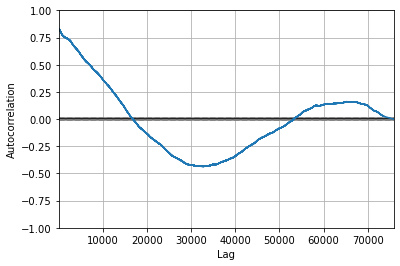

In [256]:
#per hourly
pd.plotting.autocorrelation_plot(dataframe['2005']['mean_temp'])

    Cycle is repeating at 6500 hours i.e. 10 months

<ipython-input-257-4e88744de6f7>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pd.plotting.autocorrelation_plot(dataframe['2005']['mean_temp'].resample("1m").mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

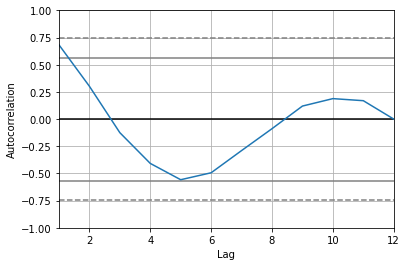

In [257]:
#per monthly
pd.plotting.autocorrelation_plot(dataframe['2005']['mean_temp'].resample("1m").mean())

       Cycle is repeating at 6500 hours i.e. 10 months

<ipython-input-258-b1a40ba8e790>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pd.plotting.autocorrelation_plot(dataframe['2005']['mean_dew_point'].resample("1m").mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

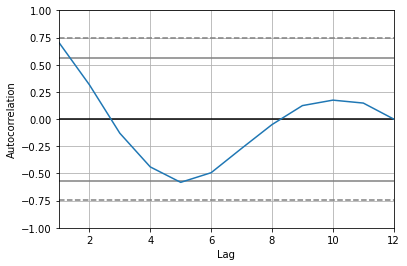

In [258]:
pd.plotting.autocorrelation_plot(dataframe['2005']['mean_dew_point'].resample("1m").mean())
#here also we see there is cyclicity of 10 months

<ipython-input-259-693e32046d26>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pd.plotting.autocorrelation_plot(dataframe['2005']['mean_sealevel_pressure'].resample("1m").mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

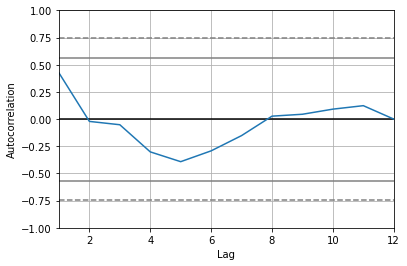

In [259]:
pd.plotting.autocorrelation_plot(dataframe['2005']['mean_sealevel_pressure'].resample("1m").mean())

# I reach to a conclusion that data has seasonality itself in 10 months. With this information we can impute the missing values.
    We can not impute with global mean or median, beacuse with time series data there is generally some seasonality in the data that means if we take the average we are considering  the maximum and minimum value of the information, in the average which leads to shift of mean value towards it and gives a misleading value.

In [132]:
dataframe.isnull().sum()

station_number                   0
year                             0
month                            0
day                              0
mean_temp                        0
mean_dew_point                 158
mean_sealevel_pressure      145847
mean_station_pressure       369069
mean_visibility               9679
mean_wind_speed                360
max_temperature_explicit        98
total_precipitation          45344
snow_depth                  371089
snow                             0
month_year                       0
dtype: int64

<AxesSubplot:xlabel='Date'>

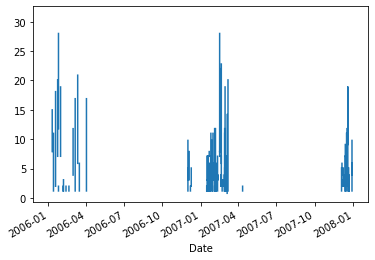

In [26]:
t1 = dataframe['2006':'2007']['snow_depth']
t1.plot()

<AxesSubplot:xlabel='Date'>

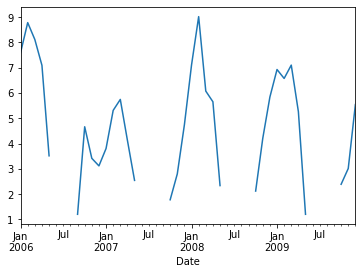

In [162]:
dataframe['2006':'2009']['snow_depth'].resample('1m').mean().plot()

    snow depth has lot of missing values, it is because it a seasonal phenomenon. AS we can see from the above line graph it snows from from September to May only. Though the depth of snow is decreasing over time, but still we can see some time of seasonality here.

# As it snows only in month of Sept-May and goal is to predict if it snows or not. We will definately consider all the months and replace the NAs of remaining months for attribute snow_depth with value 0.

Methods of filling values in Time Series:
    
    Lets say t row has missing value.
    
    1. backfilling: imputing value of t-1 in t row
    2. forward filling: imputing value of t+1 in t row
    3. Rolling mean window 
        lets say window = 3
        it will take mean of last 3 values and impute in t row.

In [188]:
dataframe.columns

Index(['station_number', 'year', 'month', 'day', 'mean_temp', 'mean_dew_point',
       'mean_sealevel_pressure', 'snow_depth', 'snow', 'month_year'],
      dtype='object')

In [189]:
dataframe.isnull().sum()

station_number                 0
year                           0
month                          0
day                            0
mean_temp                      0
mean_dew_point               158
mean_sealevel_pressure    145847
snow_depth                371089
snow                           0
month_year                     0
dtype: int64

need to fill values in 3 desired columns = mean_dew_point',
       'mean_sealevel_pressure', 'snow_depth'.
       

In [53]:
df_3 = dataframe.copy()

In [60]:
dataframe[['mean_dew_point_roll','mean_sealevel_pressure_roll','snow_depth_roll']]= dataframe[['mean_dew_point','mean_sealevel_pressure','snow_depth']].rolling(window=5, min_periods=2).mean()

In [62]:
dataframe= dataframe.drop(['mean_dew_point','mean_sealevel_pressure','snow_depth', 'month_year'], axis=1)

In [68]:
dataframe

,station_number,year,month,day,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,,,,,,
2005-01-01,725520,2005,1,1,27.700001,True,NaN,NaN,NaN
2005-01-01,726060,2005,1,1,43.500000,False,26.550001,1019.649994,NaN
2005-01-01,726163,2005,1,1,41.700001,False,28.133334,1020.566671,NaN
2005-01-01,725300,2005,1,1,32.099998,False,26.400001,1022.375015,NaN
2005-01-01,725383,2005,1,1,35.900002,True,26.520000,1022.375015,NaN
...,...,...,...,...,...,...,...,...,...
2009-12-31,725456,2009,12,31,28.600000,False,17.080000,1020.366659,NaN
2009-12-31,725453,2009,12,31,12.800000,False,12.260000,1022.799988,NaN
2009-12-31,725462,2009,12,31,20.500000,False,12.500000,1022.700012,NaN


<ipython-input-64-cc67d42eca8b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dataframe['2006']['snow_depth_roll'].plot()


<AxesSubplot:xlabel='Date'>

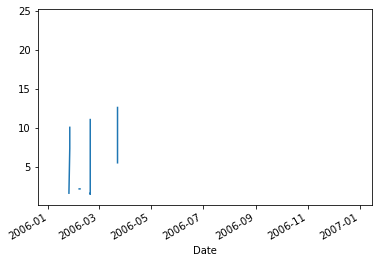

In [64]:
dataframe['2006']['snow_depth_roll'].plot()

it means the value is 0 for the time period here, lets replace it with 0

In [69]:
dataframe= dataframe.fillna(0)

In [70]:
dataframe.isnull().sum()

station_number                 0
year                           0
month                          0
day                            0
mean_temp                      0
snow                           0
mean_dew_point_roll            0
mean_sealevel_pressure_roll    0
snow_depth_roll                0
dtype: int64

In [71]:
dataframe


,station_number,year,month,day,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,,,,,,
2005-01-01,725520,2005,1,1,27.700001,True,0.000000,0.000000,0.0
2005-01-01,726060,2005,1,1,43.500000,False,26.550001,1019.649994,0.0
2005-01-01,726163,2005,1,1,41.700001,False,28.133334,1020.566671,0.0
2005-01-01,725300,2005,1,1,32.099998,False,26.400001,1022.375015,0.0
2005-01-01,725383,2005,1,1,35.900002,True,26.520000,1022.375015,0.0
...,...,...,...,...,...,...,...,...,...
2009-12-31,725456,2009,12,31,28.600000,False,17.080000,1020.366659,0.0
2009-12-31,725453,2009,12,31,12.800000,False,12.260000,1022.799988,0.0
2009-12-31,725462,2009,12,31,20.500000,False,12.500000,1022.700012,0.0


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [72]:
for station in list_station:
    dfa = dataframe.loc[dataframe['station_number']==station,:]
    dfa.to_csv('%s/%d_station_number.csv' %('/home/jyoti/Project/7learnings/code-challenges/datascience/stations/', station),index=False)

In [74]:
len(list_station)

217

In [106]:
top10 = dataframe.copy()

In [107]:
top10['snow_depth_roll'].max()

34.44999980926514

In [108]:
top10.loc[top10['snow_depth_roll']>30]

,station_number,year,month,day,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,,,,,,
2005-01-09,725846,2005,1,9,33.900002,False,25.400000,1021.599996,31.500000
2005-01-09,725640,2005,1,9,40.299999,False,25.080000,1018.625000,31.500000
2005-01-09,725496,2005,1,9,24.700001,True,24.180000,1016.500000,31.500000
2005-01-09,725478,2005,1,9,23.600000,False,24.080000,1016.200012,31.500000
2005-01-11,725610,2005,1,11,28.799999,True,25.139999,1012.574997,31.500001
2008-02-04,725895,2008,2,4,18.299999,False,21.640000,1010.833333,34.450000
2008-02-04,725476,2008,2,4,30.799999,False,20.740000,1013.100006,34.450000
2008-02-04,725946,2008,2,4,40.700001,False,23.700000,1016.266663,34.450000
2008-02-04,725458,2008,2,4,31.500000,False,23.820000,1021.250000,34.450000


In [109]:
top10 = top10['2008-02-04':'2008-02-04']

In [110]:
top10

,station_number,year,month,day,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,,,,,,
2008-02-04,725477,2008,2,4,32.299999,False,21.06,1005.625015,0.0
2008-02-04,726155,2008,2,4,33.099998,False,20.60,1007.600016,0.0
2008-02-04,725556,2008,2,4,32.099998,False,23.14,1005.700012,0.0
2008-02-04,726184,2008,2,4,32.799999,False,23.20,0.000000,0.0
2008-02-04,725810,2008,2,4,29.700001,False,23.90,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2008-02-04,725493,2008,2,4,31.799999,False,28.50,1006.400004,0.0
2008-02-04,725414,2008,2,4,32.400002,False,28.82,1006.649994,0.0
2008-02-04,726185,2008,2,4,33.000000,False,29.80,1020.000031,0.0


In [111]:
top10 = top10.reset_index()
top10 = top10.drop(['Date','year','month', 'day'], axis =1)

In [112]:
top10['station_number'].nunique()

208

In [113]:
top10

,station_number,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
0,725477,32.299999,False,21.06,1005.625015,0.0
1,726155,33.099998,False,20.60,1007.600016,0.0
2,725556,32.099998,False,23.14,1005.700012,0.0
3,726184,32.799999,False,23.20,0.000000,0.0
4,725810,29.700001,False,23.90,0.000000,0.0
...,...,...,...,...,...,...
203,725493,31.799999,False,28.50,1006.400004,0.0
204,725414,32.400002,False,28.82,1006.649994,0.0
205,726185,33.000000,False,29.80,1020.000031,0.0
206,725316,39.700001,True,31.72,1016.733358,0.0


In [116]:
# lets find the top 10 stations for a particular date(date chosen here was when snow was maximum)
# we can do it with cumulative sum approach.
#lets sort the values in descending order
top10.sort_values(by='snow_depth_roll', inplace = True, ascending= False)

In [117]:
top10

,station_number,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
154,725895,18.299999,False,21.64,1010.833333,34.45
157,725458,31.500000,False,23.82,1021.250000,34.45
155,725476,30.799999,False,20.74,1013.100006,34.45
156,725946,40.700001,False,23.70,1016.266663,34.45
99,726073,32.099998,False,22.40,1019.599976,5.90
...,...,...,...,...,...,...
205,726185,33.000000,False,29.80,1020.000031,0.00
184,725350,33.200001,True,26.76,1009.766663,0.00
183,725480,30.000000,True,24.38,1007.399994,0.00
182,725628,33.299999,False,23.64,1013.250000,0.00


In [118]:
top10['snow_depth_roll'].cumsum(axis=0)

154     34.450000
157     68.900000
155    103.349999
156    137.799999
99     143.699999
          ...    
205    172.950000
184    172.950000
183    172.950000
182    172.950000
35     172.950000
Name: snow_depth_roll, Length: 208, dtype: float64

In [120]:
top10['cum_percent']= 100 * (top10['snow_depth_roll'].cumsum()/top10['snow_depth_roll'].sum())

In [121]:
top10

,station_number,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll,cum_percent
154,725895,18.299999,False,21.64,1010.833333,34.45,19.919052
157,725458,31.500000,False,23.82,1021.250000,34.45,39.838103
155,725476,30.799999,False,20.74,1013.100006,34.45,59.757155
156,725946,40.700001,False,23.70,1016.266663,34.45,79.676207
99,726073,32.099998,False,22.40,1019.599976,5.90,83.087597
...,...,...,...,...,...,...,...
205,726185,33.000000,False,29.80,1020.000031,0.00,100.000000
184,725350,33.200001,True,26.76,1009.766663,0.00,100.000000
183,725480,30.000000,True,24.38,1007.399994,0.00,100.000000
182,725628,33.299999,False,23.64,1013.250000,0.00,100.000000


In [122]:
top10 = top10.loc[top10['cum_percent']<=90,:]

In [123]:
top10

,station_number,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll,cum_percent
154,725895,18.299999,False,21.64,1010.833333,34.45,19.919052
157,725458,31.500000,False,23.82,1021.250000,34.45,39.838103
155,725476,30.799999,False,20.74,1013.100006,34.45,59.757155
156,725946,40.700001,False,23.70,1016.266663,34.45,79.676207
99,726073,32.099998,False,22.40,1019.599976,5.90,83.087597
98,726050,32.200001,False,23.82,1019.199992,5.90,86.498988
97,725430,33.200001,True,23.82,1019.133341,5.90,89.910379


In [124]:
#There are 7 stations which holds for maximum snow in the town

In [125]:
# now lets take out the data for these 7 stations and analyse

In [132]:
a= list(top10['station_number'])
a

In [138]:
#extracting datframe for the top stations

In [137]:
dataframe = dataframe.loc[dataframe['station_number'].isin(a)]

,station_number,year,month,day,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,,,,,,
2005-01-01,725895,2005,1,1,28.000000,False,20.68,1014.500000,0.0
2005-01-01,725476,2005,1,1,22.400000,True,22.46,1024.533305,0.0
2005-01-01,725946,2005,1,1,42.700001,False,28.18,1013.259998,0.0
2005-01-01,725430,2005,1,1,28.500000,False,17.34,1021.000000,0.0
2005-01-01,725458,2005,1,1,25.000000,True,19.64,1021.733358,0.0
...,...,...,...,...,...,...,...,...,...
2009-12-31,725430,2009,12,31,25.600000,False,18.42,1019.775009,0.0
2009-12-31,726050,2009,12,31,18.400000,False,9.16,1023.525009,0.0
2009-12-31,725895,2009,12,31,28.600000,False,23.60,1019.000000,0.0


In [140]:
dataframe = dataframe.drop(['month', 'year', 'day'], axis=1)

In [141]:
dataframe

,station_number,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,,,
2005-01-01,725520,27.700001,True,0.000000,0.000000,0.0
2005-01-01,726060,43.500000,False,26.550001,1019.649994,0.0
2005-01-01,726163,41.700001,False,28.133334,1020.566671,0.0
2005-01-01,725300,32.099998,False,26.400001,1022.375015,0.0
2005-01-01,725383,35.900002,True,26.520000,1022.375015,0.0
...,...,...,...,...,...,...
2009-12-31,725456,28.600000,False,17.080000,1020.366659,0.0
2009-12-31,725453,12.800000,False,12.260000,1022.799988,0.0
2009-12-31,725462,20.500000,False,12.500000,1022.700012,0.0


In [142]:
#for station in a:
 #   dfa = dataframe.loc[dataframe['station_number']==station,:]
  #  dfa.to_csv('%s/%d_station_number.csv' %('/home/jyoti/Project/7learnings/code-challenges/datascience/stations/', station),index=False)

In [ ]:
#lets choose one station 725430

In [149]:
df_temp = dataframe.loc[dataframe['station_number']==725430]

In [151]:
df_temp= df_temp.drop('station_number', axis=1)

In [152]:
df_temp

,mean_temp,snow,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,,
2005-01-01,28.500000,False,17.34,1021.000000,0.00
2005-01-02,37.599998,True,26.56,1028.166646,0.00
2005-01-03,30.900000,True,30.28,1025.766683,0.00
2005-01-04,28.200001,True,17.84,1027.566650,0.00
2005-01-05,23.799999,True,17.06,1024.199992,2.55
...,...,...,...,...,...
2009-12-27,17.500000,True,21.08,1014.300003,0.00
2009-12-28,23.000000,False,18.46,1022.300018,0.00
2009-12-29,11.000000,False,13.52,1026.660022,0.00


In [153]:
X= df_temp.loc[:, df_temp.columns != 'snow']
Y= df_temp['snow']

In [154]:
X

,mean_temp,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,
2005-01-01,28.500000,17.34,1021.000000,0.00
2005-01-02,37.599998,26.56,1028.166646,0.00
2005-01-03,30.900000,30.28,1025.766683,0.00
2005-01-04,28.200001,17.84,1027.566650,0.00
2005-01-05,23.799999,17.06,1024.199992,2.55
...,...,...,...,...
2009-12-27,17.500000,21.08,1014.300003,0.00
2009-12-28,23.000000,18.46,1022.300018,0.00
2009-12-29,11.000000,13.52,1026.660022,0.00


In [157]:
Y

Date
2005-01-01    False
2005-01-02     True
2005-01-03     True
2005-01-04     True
2005-01-05     True
              ...  
2009-12-27     True
2009-12-28    False
2009-12-29    False
2009-12-30    False
2009-12-31    False
Name: snow, Length: 1824, dtype: bool

In [165]:
len(X)

1824

In [171]:
trainsize = int(len(X)*0.80)
print(trainsize)
validsize = int(len(X)*0.10)
print(validsize)
validsize = trainsize + validsize
print(validsize)
testsize = validsize + int(len(X)*0.10)+1
print(testsize)

1459
182
1641
1824


In [248]:
X_train, X_valid, X_test = X[0:trainsize],X[trainsize:validsize],X[validsize:testsize]

In [249]:
X_test

,mean_temp,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll
Date,,,,
2009-07-02,62.500000,53.720000,1011.833333,0.0
2009-07-03,67.199997,55.800001,1016.625000,0.0
2009-07-04,66.199997,58.859998,1016.733337,0.0
2009-07-05,67.400002,56.100000,1014.099996,0.0
2009-07-06,70.800003,51.140001,1011.300000,0.0
...,...,...,...,...
2009-12-27,17.500000,21.080000,1014.300003,0.0
2009-12-28,23.000000,18.460000,1022.300018,0.0
2009-12-29,11.000000,13.520000,1026.660022,0.0


In [250]:
Y_train, Y_valid, Y_test = Y[0:trainsize],Y[trainsize:validsize],Y[validsize:testsize]

In [251]:
Y_train

Date
2005-01-01    False
2005-01-02     True
2005-01-03     True
2005-01-04     True
2005-01-05     True
              ...  
2008-12-27     True
2008-12-28    False
2008-12-29    False
2008-12-30    False
2008-12-31    False
Name: snow, Length: 1459, dtype: bool

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [252]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]

'2009-12-18'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [253]:
from sklearn.ensemble import RandomForestClassifier


In [254]:
clf = RandomForestClassifier(n_estimators = 300)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_valid)

In [255]:
from sklearn import metrics

In [256]:
print(f'accuracy on valid set is {metrics.accuracy_score(Y_valid, Y_pred)}')

accuracy on valid set is 0.8901098901098901


In [257]:
# lets find out important features extracted by Random Forest
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending = False)

In [258]:
feature_imp

mean_dew_point_roll            0.340960
mean_temp                      0.320647
mean_sealevel_pressure_roll    0.312174
snow_depth_roll                0.026218
dtype: float64

In [259]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

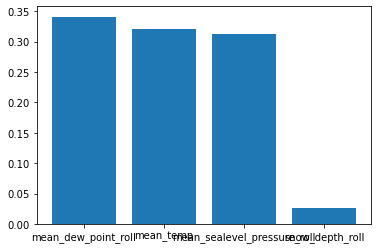

In [260]:
plt.bar(height=feature_imp, x=feature_imp.index)

In [261]:
Y_pred_test = clf.predict(X_test)

In [230]:
print(f'accuracy on test set is {metrics.accuracy_score(Y_test, Y_pred_test)}')

accuracy on test set is 0.8688524590163934


In [266]:
X_test['2009-12-05':'2009-12-05']

,mean_temp,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll,result
Date,,,,,
2009-12-05,24.0,15.44,1021.450012,0.0,False


In [264]:
X_test['result']= Y_pred_test

<ipython-input-264-e7e9a5e1b65e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['result']= Y_pred_test


In [265]:
X_test

,mean_temp,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll,result
Date,,,,,
2009-07-02,62.500000,53.720000,1011.833333,0.0,False
2009-07-03,67.199997,55.800001,1016.625000,0.0,False
2009-07-04,66.199997,58.859998,1016.733337,0.0,False
2009-07-05,67.400002,56.100000,1014.099996,0.0,False
2009-07-06,70.800003,51.140001,1011.300000,0.0,False
...,...,...,...,...,...
2009-12-27,17.500000,21.080000,1014.300003,0.0,False
2009-12-28,23.000000,18.460000,1022.300018,0.0,False
2009-12-29,11.000000,13.520000,1026.660022,0.0,False


In [269]:
X_test.loc[X_test['result']==True]

,mean_temp,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll,result
Date,,,,,
2009-07-08,63.200001,61.00,1012.666667,0.0,True
2009-08-21,64.500000,60.02,1010.533346,0.0,True
2009-11-26,36.200001,30.70,1009.599976,0.0,True
2009-12-26,20.000000,16.92,1021.733317,5.1,True


In [267]:
X_test['2009-12-05':'2009-12-05']

,mean_temp,mean_dew_point_roll,mean_sealevel_pressure_roll,snow_depth_roll,result
Date,,,,,
2009-12-05,24.0,15.44,1021.450012,0.0,False


In [277]:
#Lets remove snow_depth and do the prediction

In [278]:
X_train = X_train.drop('snow_depth_roll', axis=1)
X_test = X_test.drop('snow_depth_roll', axis=1)
X_valid = X_valid.drop('snow_depth_roll', axis=1)

In [282]:
clf = RandomForestClassifier(n_estimators = 300)
clf.fit(X_train, Y_train)
Y_pred_valid = clf.predict(X_valid)
print(f'accuracy on valid set is {metrics.accuracy_score(Y_valid, Y_pred_valid)}')

accuracy on valid set is 0.8956043956043956


In [286]:
X_test = X_test.drop('result', axis=1)

In [287]:
Y_pred_test = clf.predict(X_test)
print(f'accuracy on valid set is {metrics.accuracy_score(Y_test, Y_pred_test)}')

accuracy on valid set is 0.8633879781420765


In [288]:
X_test['result']= Y_pred_test

In [289]:
X_test.loc[X_test['result']==True]

,mean_temp,mean_dew_point_roll,mean_sealevel_pressure_roll,result
Date,,,,
2009-08-14,73.300003,64.179999,1018.799988,True
2009-08-21,64.500000,60.020000,1010.533346,True
2009-11-26,36.200001,30.700000,1009.599976,True


In [292]:
X_test['2009-12-05':'2009-12-05']

,mean_temp,mean_dew_point_roll,mean_sealevel_pressure_roll,result
Date,,,,
2009-12-05,24.0,15.44,1021.450012,False


It wont snow on the 2009-12-05	 in station 725430